In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [70]:
df=pd.read_csv('iris.data.csv',header=None)

In [73]:
df

0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]

In [72]:
df.nunique()

0    35
1    23
2    43
3    22
4     3
dtype: int64

In [56]:
iris = load_iris()
X = iris.data
y = iris.target

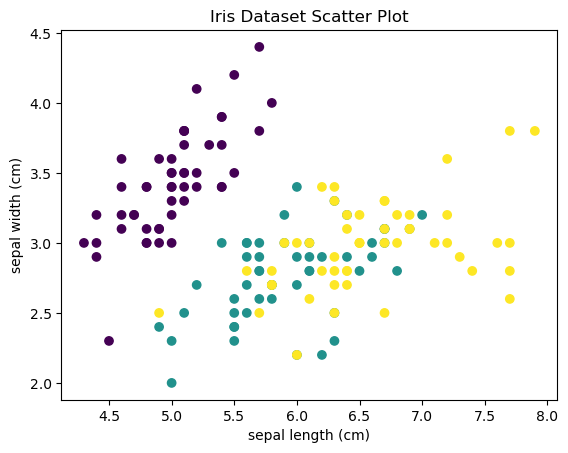

In [57]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Iris Dataset Scatter Plot')
plt.show()

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
def k_value(X, k=1, max_k=10, wcss_list=None):
    if wcss_list is None:
        wcss_list = []
    if k > max_k:
        return wcss_list
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
    return k_value(X, k + 1, max_k, wcss_list)

In [60]:
def find_elbow(wcss):
    deltas = np.diff(wcss)
    double_deltas = np.diff(deltas)
    elbow_point = np.argmax(double_deltas) + 2 
    return elbow_point

In [61]:
wcss = k_value(X_scaled, k=1, max_k=10)

optimal_k = find_elbow(wcss)
print("Optimal number of clusters (k):", optimal_k)

Optimal number of clusters (k): 2


In [62]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

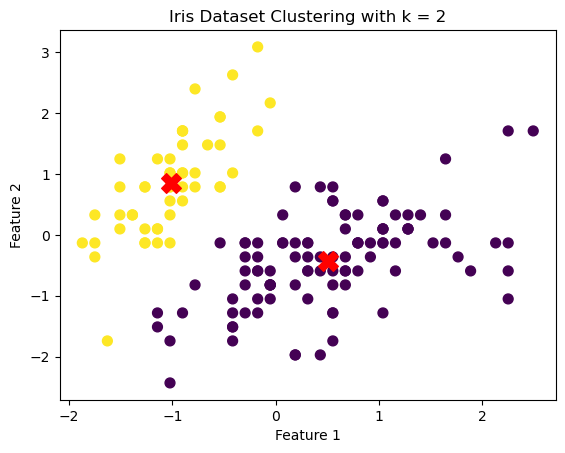

In [64]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')
plt.title(f"Iris Dataset Clustering with k = {optimal_k}")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [77]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [78]:
iris = load_iris()
X = iris.data 
y = iris.target 

In [79]:
def kmeans(X, k=3, max_iters=100):
    np.random.seed(42) 
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for i in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        if np.all(centroids == new_centroids):
            break   
        centroids = new_centroids

    return centroids, labels

In [80]:
k = 3
centroids, labels = kmeans(X, k)

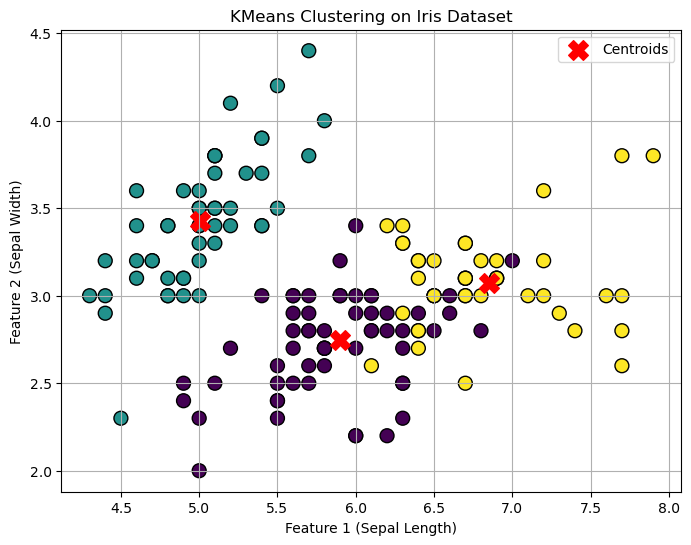

Final Centroids:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [81]:
plt.figure(figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=100)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel('Feature 1 (Sepal Length)')
plt.ylabel('Feature 2 (Sepal Width)')
plt.legend()
plt.grid(True)
plt.show()

print("Final Centroids:")
print(centroids)